In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

LABELS = ["retained", "churned"]

In [2]:
Customer_churn = pd.read_csv('/content/drive/MyDrive/churn/Churn_Modelling.csv')
Customer_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
Customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
colmun_to_drop=['RowNumber','CustomerId','Surname',]
Customer_churn = Customer_churn.drop(colmun_to_drop,axis=1)

In [5]:
Customer_churn['Gender']=Customer_churn['Gender'].replace({'Female': 1, 'Male': 0})
Customer_churn['Exited']=Customer_churn['Exited'].replace({ 1 : 'Churn', 0 : 'not Churn'})
le=LabelEncoder()
Customer_churn['Geography'] = le.fit_transform(Customer_churn['Geography'])

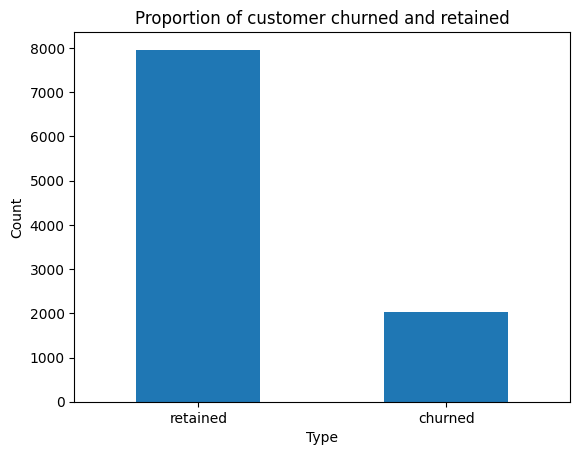

In [6]:
count_classes = pd.value_counts(Customer_churn['Exited'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Proportion of customer churned and retained")
plt.xticks(range(2), LABELS)
plt.xlabel("Type")
plt.ylabel("Count");

In [7]:
X = Customer_churn.drop('Exited', axis=1)
y = Customer_churn['Exited']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
Customer_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,Churn
1,608,2,1,41,1,83807.86,1,0,1,112542.58,not Churn
2,502,0,1,42,8,159660.80,3,1,0,113931.57,Churn
3,699,0,1,39,1,0.00,2,0,0,93826.63,not Churn
4,850,2,1,43,2,125510.82,1,1,1,79084.10,not Churn


In [10]:
Customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test_scaled)

In [14]:
accuracy = model.score(X_test_scaled, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.815
